In [17]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
import matplotlib.pyplot as plt

## Read data

In [18]:
df = pd.read_csv("../data/sonar.all-data.csv")
df.head()


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute52,Attribute53,Attribute54,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Class types

In [19]:
print(df["class"].unique())


['R' 'M']


count types

<Axes: xlabel='class'>

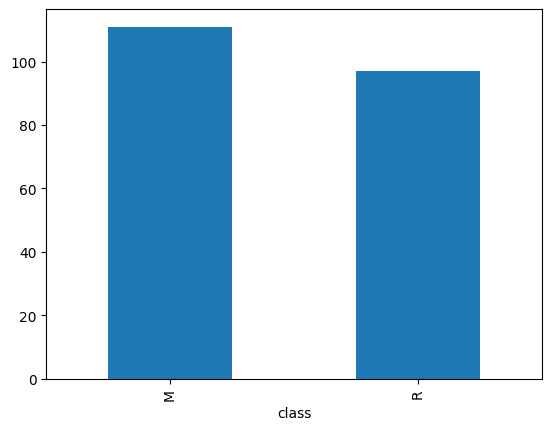

In [20]:
df["class"].value_counts().plot(kind="bar")

## Get X, Y

In [21]:
X = df.iloc[:, :-1]
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute51,Attribute52,Attribute53,Attribute54,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


convert labels to 1, -1

In [22]:
targeted_label = {"M":1, "R":-1}
Y = df["class"].map(targeted_label)
Y.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: class, dtype: int64

# Perceptron

## Split train test

In [23]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=192)
print(X_train.shape)
print(Y_test.shape)

(145, 60)
(63,)


In [24]:
model = linear_model.Perceptron(max_iter=100000)
model.fit(X_train, Y_train)

Perceptron(max_iter=100000)

In [25]:
Y_predicts = model.predict(X_test)
Y_predicts

array([ 1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
        1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1], dtype=int64)

In [26]:
acc = metrics.accuracy_score(Y_test, Y_predicts)
recall = metrics.recall_score(Y_test, Y_predicts)
precision = metrics.precision_score(Y_test, Y_predicts)

print(f"Accuracy: {acc}\nRecall: {recall}\nPrecision: {precision}")

Accuracy: 0.746031746031746
Recall: 0.9285714285714286
Precision: 0.65


---

## Perceptron (CRASH)

In [27]:
def h(w, x):
    return np.sign(w.T @ x)

In [28]:
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

In [29]:
def perceptron(X, y, w_init, max_iter=1000):
    w = [w_init]
    N = X.shape[1]
    mis_points = []

    i = 0
    while (i <= max_iter):
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]]
            yi = y[mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break

        i+=1

    return (w, mis_points)

In [30]:
ones = np.ones(shape=(X.shape[0], 1))
X = np.concatenate((ones, X), axis=1)
X


array([[1.    , 0.02  , 0.0371, ..., 0.0084, 0.009 , 0.0032],
       [1.    , 0.0453, 0.0523, ..., 0.0049, 0.0052, 0.0044],
       [1.    , 0.0262, 0.0582, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [1.    , 0.0522, 0.0437, ..., 0.0138, 0.0077, 0.0031],
       [1.    , 0.0303, 0.0353, ..., 0.0079, 0.0036, 0.0048],
       [1.    , 0.026 , 0.0363, ..., 0.0036, 0.0061, 0.0115]])

In [31]:
n_dim = X.shape[1]
w_init = np.random.randn(n_dim, 1)
print(w_init.shape)
# w, m = 

(61, 1)


Remember h(x): w.T * x

In [32]:
X.T.shape

(61, 208)

run this makes me crash

In [33]:
w, m = perceptron(X.T, Y, w_init, max_iter=100)

[array([[ 0.19313486],
        [-0.45310067],
        [ 1.25307396],
        [ 1.37250633],
        [ 0.08308329],
        [ 1.02272728],
        [-1.21015565],
        [-0.58346809],
        [ 0.20802564],
        [ 1.15170904],
        [ 1.53583976],
        [ 0.76873107],
        [ 0.30324256],
        [-0.28134166],
        [ 0.15591078],
        [ 0.2968423 ],
        [-0.54480597],
        [ 0.72597341],
        [ 1.01601746],
        [ 0.0386002 ],
        [-0.66335867],
        [ 1.30736133],
        [ 0.3872534 ],
        [-1.37002794],
        [ 1.03454694],
        [-1.82596453],
        [-1.13965945],
        [ 0.90145582],
        [ 0.18486087],
        [ 1.14731396],
        [ 0.18848656],
        [ 0.67457699],
        [-0.36682824],
        [-0.36564004],
        [ 0.76592603],
        [-0.71420389],
        [ 0.99499539],
        [ 0.10604962],
        [ 1.07861217],
        [-0.7405795 ],
        [ 0.20837457],
        [-1.52769233],
        [-1.25350836],
        [ 0

In [41]:
w[-1][-1]

array([ 0.02368119,  0.78708119,  1.06338119,  1.07928119,  1.35488119,
        1.37108119,  0.90668119,  1.51108119,  2.31978119,  4.00928119,
        4.58048119,  5.19048119,  5.12378119,  4.06338119,  3.07768119,
        2.23848119,  1.12198119, -0.31821881,  0.14348119,  3.19938119,
        3.82688119,  4.07438119,  3.12388119,  2.71238119,  2.85428119,
        0.70498119, -0.37921881, -1.03911881, -1.32201881, -0.91751881,
       -1.58231881, -3.68531881, -2.29771881, -3.27921881, -4.96821881,
       -5.94411881, -6.98431881, -5.20821881, -1.60701881,  0.02528119,
       -0.73921881,  0.23688119,  1.65548119,  3.44348119,  4.05858119,
        5.53568119,  4.69978119,  2.87408119,  2.19598119,  1.55488119,
        0.36568119,  0.33658119,  0.29248119,  0.07858119,  0.09548119,
        0.10758119,  0.11088119,  0.02138119,  0.10658119,  0.11888119,
        0.07468119])

---